In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [120]:
student = pd.read_csv('datasets/S1_CSE_2019.csv',skiprows=1).drop('Total',axis='columns')
student.shape

(68, 10)

In [121]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 10 columns):
Roll Number    68 non-null int64
Regd No        68 non-null int64
Name           68 non-null object
Q1             67 non-null float64
Q2             68 non-null int64
Q3             61 non-null float64
Q4             55 non-null float64
Q5             55 non-null float64
Q6             62 non-null float64
Q7             59 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 5.4+ KB


In [236]:
##Describing the dataset
student.describe().drop(['Roll Number',"Regd No"], axis="columns").drop(['count','25%','50%','75%']).T.round(2)

,mean,std,min,max
Q1,7.13,2.06,0.0,8.0
Q2,9.35,2.26,0.0,10.0
Q3,2.40,2.19,0.0,6.0
Q4,4.37,3.82,0.0,8.0
Q5,3.57,3.24,0.0,8.0
Q6,1.99,1.48,0.0,7.0
Q7,4.12,3.23,0.0,8.0
Total,32.93,12.27,0.0,50.0


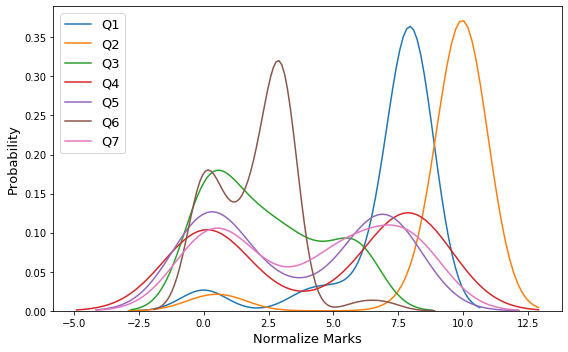

In [232]:
student.fillna(0, axis = 1, inplace = True)
qns_cols = student.columns[3:10]

plt.figure(figsize=[8,5])
for col in qns_cols: 
    sns.kdeplot(student[col])
    
plt.xlabel("Normalize Marks", fontsize=13)
plt.ylabel("Probability", fontsize=13)
plt.legend(loc="upper left", fontsize=13)

plt.tight_layout()

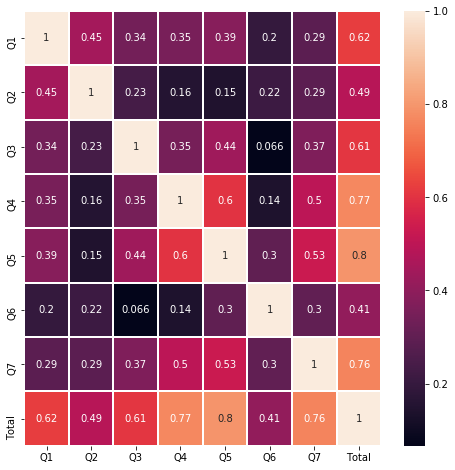

In [237]:
plt.figure(figsize=[8,8])
# print(student.columns)
student_cor = student.drop(['Roll Number', 'Regd No', 'Name'], axis=1)
sns.heatmap(student_cor.corr(), annot = True, linewidths=1)

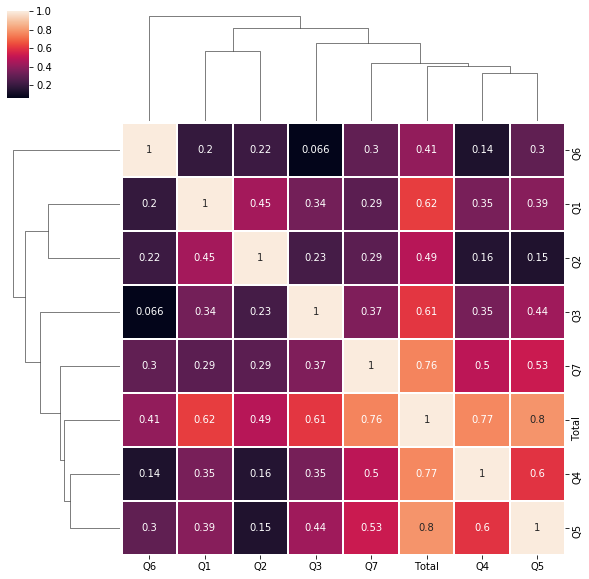

In [238]:
sns.clustermap(student_cor.corr(), annot = True, linewidths=1)

In [239]:
##Mean of average question 1
q_means = [student[q].mean() for q in qns_cols]
q_max = [8,10,6,8,8,7,8]
Q_means = pd.DataFrame({"Mean":q_means, 
                        "Max Marks":q_max}, index=qns_cols)
Q_means.T

,Q1,Q2,Q3,Q4,Q5,Q6,Q7
Mean,7.132353,9.352941,2.397059,4.367647,3.573529,1.985294,4.117647
Max Marks,8.000000,10.000000,6.000000,8.000000,8.000000,7.000000,8.000000


In [242]:
student['Total'] = np.zeros(len(student))
for q in qns_cols:
    student['Total'] = student['Total'] + student[q]
student[student['Total']<17.5].set_index('Roll Number')

,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
Roll Number,,,,,,,,,,
5,201800024,Suchismita Paul,8.0,9,0.0,0.0,0.0,0.0,0.0,17.0
14,201800094,Shubhans Shukla,7.0,1,1.0,0.0,1.0,1.0,1.0,12.0
17,201800104,Rachit Rajalim Rai,0.0,9,0.0,0.0,0.0,0.0,8.0,17.0
20,201800135,Manoj Singh,0.0,10,0.0,0.0,0.0,3.0,0.0,13.0
31,201800318,Siddharth Basnet,4.0,10,1.0,0.0,0.0,0.0,0.0,15.0
67,201500445,Aditya Kumar,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
68,201600441,Riya Rama,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Training a Linear Regression Model

In [211]:
X = student[['Q6', 'Q2', 'Q3','Q4', 'Q5', 'Q7']]
y = student['Q1']

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [214]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
coeff_df = pd.DataFrame(lm.coef_, X.columns,columns=['Coefficient'])
coeff_df.T

,Q6,Q2,Q3,Q4,Q5,Q7
Coefficient,-0.12755,-0.354415,0.072229,-0.031468,0.087384,0.120024


In [216]:
## Predictions from our Model

In [218]:
predictions = lm.predict(X_test)
lm.score(X_test, y_test)

-0.7494809508079774

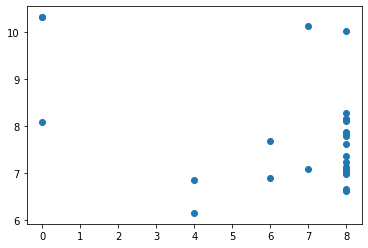

In [219]:
plt.scatter(y_test,predictions)

In [99]:
##Residual Histogram

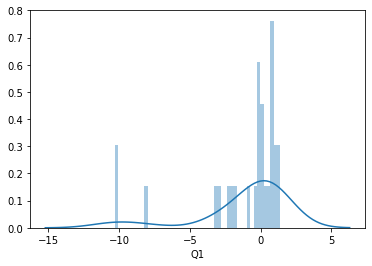

In [220]:
sns.distplot((y_test-predictions),bins=50);

In [221]:
##Who all scored the Highest marks in Q1?

In [222]:
student[student['Q1']==student['Q1'].max()].head()

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
0,1,201800001,Suvam Maity,8.0,10,4.0,0.0,6.0,1.0,1.0,30.0
1,2,201800006,Kritartha Patowary,8.0,10,2.0,0.0,0.0,3.0,1.0,24.0
2,3,201800013,Abhisek Kumar Prasad,8.0,10,1.0,8.0,6.0,1.0,2.0,36.0
3,4,201800020,Harsh Kumar Pandey,8.0,1,1.0,8.0,7.0,3.0,0.0,28.0
4,5,201800024,Suchismita Paul,8.0,9,0.0,0.0,0.0,0.0,0.0,17.0


In [103]:
##Who all scored the Highest marks in Q2?

In [104]:
student[student['Q2']==student['Q2'].max()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
0,1,201800001,Suvam Maity,8.0,10,4.0,0.0,6.0,1.0,1.0,30
1,2,201800006,Kritartha Patowary,8.0,10,2.0,0.0,0.0,3.0,1.0,24
2,3,201800013,Abhisek Kumar Prasad,8.0,10,1.0,8.0,6.0,1.0,2.0,36
5,6,201800027,Pragya Mishra,8.0,10,3.0,0.0,7.0,3.0,8.0,39
6,7,201800038,Richik Guha,8.0,10,0.0,8.0,3.0,3.0,8.0,40
7,8,201800051,Aradhit Das,8.0,10,6.0,8.0,7.0,3.0,8.0,50
8,9,201800065,Shayantan Dutta Choudhury,8.0,10,3.0,8.0,7.0,0.0,8.0,44
9,10,201800077,Aranya Jha,8.0,10,2.0,8.0,7.0,3.0,8.0,46
10,11,201800084,Yashh,8.0,10,3.0,8.0,8.0,2.0,6.0,45
11,12,201800088,Praveen Sharma,8.0,10,3.0,0.0,0.0,3.0,1.0,25


In [105]:
##Who all scored the Highest marks in Q3?

In [106]:
student[student['Q3']==student['Q3'].max()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
7,8,201800051,Aradhit Das,8.0,10,6.0,8.0,7.0,3.0,8.0,50
23,24,201800199,Mayank Sunil Pagar,8.0,10,6.0,8.0,8.0,3.0,7.0,50
24,25,201800202,Seemant Sinha,8.0,10,6.0,8.0,7.0,3.0,6.0,48
39,40,201800500,Kritika Berry,8.0,10,6.0,8.0,5.0,2.0,6.0,45
44,45,201800541,Prajakta Sudhir Ghorpade,8.0,10,6.0,8.0,7.0,3.0,5.0,47
46,47,201800549,Alankrita Singh,8.0,10,6.0,2.0,7.0,2.0,8.0,43
48,49,201800564,Ayushi Prasad,8.0,10,6.0,8.0,7.0,3.0,8.0,50
49,50,201800573,Akshat Kedia,8.0,10,6.0,8.0,7.0,3.0,8.0,50
50,51,201800582,Ambuj Shekhar,8.0,10,6.0,0.0,7.0,3.0,7.0,41
55,56,201800612,Aditya Mishra,8.0,10,6.0,8.0,0.0,0.0,5.0,37


In [107]:
##Who all scored the Highest marks in Q4?

In [108]:
student[student['Q4']==student['Q4'].max()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
2,3,201800013,Abhisek Kumar Prasad,8.0,10,1.0,8.0,6.0,1.0,2.0,36
3,4,201800020,Harsh Kumar Pandey,8.0,1,1.0,8.0,7.0,3.0,0.0,28
6,7,201800038,Richik Guha,8.0,10,0.0,8.0,3.0,3.0,8.0,40
7,8,201800051,Aradhit Das,8.0,10,6.0,8.0,7.0,3.0,8.0,50
8,9,201800065,Shayantan Dutta Choudhury,8.0,10,3.0,8.0,7.0,0.0,8.0,44
9,10,201800077,Aranya Jha,8.0,10,2.0,8.0,7.0,3.0,8.0,46
10,11,201800084,Yashh,8.0,10,3.0,8.0,8.0,2.0,6.0,45
12,13,201800091,Piyush Chandan,8.0,10,2.0,8.0,4.0,1.0,8.0,41
15,16,201800100,Muddassir Hussain,8.0,10,4.0,8.0,7.0,3.0,0.0,40
18,19,201800119,Aman Agarwal,8.0,10,5.0,8.0,7.0,0.0,5.0,43


In [109]:
##Who all scored the Highest marks in Q5?

In [110]:
student[student['Q5']==student['Q5'].max()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
10,11,201800084,Yashh,8.0,10,3.0,8.0,8.0,2.0,6.0,45
23,24,201800199,Mayank Sunil Pagar,8.0,10,6.0,8.0,8.0,3.0,7.0,50
54,55,201800609,Lush Gulati,8.0,10,2.0,8.0,8.0,3.0,6.0,45


In [111]:
##Who all scored the Highest marks in Q6?

In [112]:
student[student['Q6']==student['Q6'].max()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
26,27,201800248,Punol Norzat,4.0,10,0.0,0.0,3.0,7.0,0.0,24


In [113]:
##Who all scored the Highest marks in Q7?

In [114]:
student[student['Q7']==student['Q7'].max()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
5,6,201800027,Pragya Mishra,8.0,10,3.0,0.0,7.0,3.0,8.0,39
6,7,201800038,Richik Guha,8.0,10,0.0,8.0,3.0,3.0,8.0,40
7,8,201800051,Aradhit Das,8.0,10,6.0,8.0,7.0,3.0,8.0,50
8,9,201800065,Shayantan Dutta Choudhury,8.0,10,3.0,8.0,7.0,0.0,8.0,44
9,10,201800077,Aranya Jha,8.0,10,2.0,8.0,7.0,3.0,8.0,46
12,13,201800091,Piyush Chandan,8.0,10,2.0,8.0,4.0,1.0,8.0,41
16,17,201800104,Rachit Rajalim Rai,0.0,9,0.0,0.0,0.0,0.0,8.0,17
31,32,201800333,Ashish Tiwari,8.0,10,2.0,8.0,7.0,3.0,8.0,46
41,42,201800517,Rachit Jain,8.0,10,0.0,8.0,3.0,6.0,8.0,43
42,43,201800523,Swagat Panda,8.0,10,1.0,8.0,7.0,3.0,8.0,45


In [115]:
##Who all scored the Highest marks in total?

In [116]:
student[student['Total']==student['Total'].max()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
7,8,201800051,Aradhit Das,8.0,10,6.0,8.0,7.0,3.0,8.0,50
23,24,201800199,Mayank Sunil Pagar,8.0,10,6.0,8.0,8.0,3.0,7.0,50
48,49,201800564,Ayushi Prasad,8.0,10,6.0,8.0,7.0,3.0,8.0,50
49,50,201800573,Akshat Kedia,8.0,10,6.0,8.0,7.0,3.0,8.0,50
61,62,201800655,Nilav Saikia,8.0,10,6.0,8.0,7.0,3.0,8.0,50


In [117]:
##Who all scored the lowest marks in Q1?

In [118]:
student[student['Q1']==student['Q1'].min()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
16,17,201800104,Rachit Rajalim Rai,0.0,9,0.0,0.0,0.0,0.0,8.0,17
19,20,201800135,Manoj Singh,0.0,10,0.0,0.0,0.0,3.0,0.0,13
66,67,201500445,Aditya Kumar,0.0,0,0.0,0.0,0.0,0.0,0.0,0
67,68,201600441,Riya Rama,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [119]:
##Who all scored the lowest marks in Q2?

In [120]:
student[student['Q2']==student['Q2'].min()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
66,67,201500445,Aditya Kumar,0.0,0,0.0,0.0,0.0,0.0,0.0,0
67,68,201600441,Riya Rama,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [121]:
##Who all scored the lowest marks in Q3?

In [122]:
student[student['Q3']==student['Q3'].min()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
4,5,201800024,Suchismita Paul,8.0,9,0.0,0.0,0.0,0.0,0.0,17
6,7,201800038,Richik Guha,8.0,10,0.0,8.0,3.0,3.0,8.0,40
16,17,201800104,Rachit Rajalim Rai,0.0,9,0.0,0.0,0.0,0.0,8.0,17
17,18,201800108,Gokarna Shrestha,8.0,10,0.0,0.0,1.0,2.0,0.0,21
19,20,201800135,Manoj Singh,0.0,10,0.0,0.0,0.0,3.0,0.0,13
26,27,201800248,Punol Norzat,4.0,10,0.0,0.0,3.0,7.0,0.0,24
33,34,201800459,Vaibhav Kaushik,8.0,9,0.0,8.0,7.0,2.0,5.0,39
34,35,201800465,Kumar Vishal,5.0,10,0.0,0.0,0.0,2.0,5.0,22
35,36,201800469,Harsh,8.0,10,0.0,8.0,7.0,3.0,5.0,41
37,38,201800483,Mahima Yadav,8.0,10,0.0,7.0,6.0,0.0,0.0,31


In [123]:
##Who all scored the lowest marks in Q4?

In [124]:
student[student['Q4']==student['Q4'].min()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
0,1,201800001,Suvam Maity,8.0,10,4.0,0.0,6.0,1.0,1.0,30
1,2,201800006,Kritartha Patowary,8.0,10,2.0,0.0,0.0,3.0,1.0,24
4,5,201800024,Suchismita Paul,8.0,9,0.0,0.0,0.0,0.0,0.0,17
5,6,201800027,Pragya Mishra,8.0,10,3.0,0.0,7.0,3.0,8.0,39
11,12,201800088,Praveen Sharma,8.0,10,3.0,0.0,0.0,3.0,1.0,25
13,14,201800094,Shubhans Shukla,7.0,1,1.0,0.0,1.0,1.0,1.0,12
14,15,201800097,Debraj Das,8.0,10,3.0,0.0,1.0,0.0,0.0,22
16,17,201800104,Rachit Rajalim Rai,0.0,9,0.0,0.0,0.0,0.0,8.0,17
17,18,201800108,Gokarna Shrestha,8.0,10,0.0,0.0,1.0,2.0,0.0,21
19,20,201800135,Manoj Singh,0.0,10,0.0,0.0,0.0,3.0,0.0,13


In [125]:
##Who all scored the lowest marks in Q5?

In [126]:
student[student['Q5']==student['Q5'].min()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
1,2,201800006,Kritartha Patowary,8.0,10,2.0,0.0,0.0,3.0,1.0,24
4,5,201800024,Suchismita Paul,8.0,9,0.0,0.0,0.0,0.0,0.0,17
11,12,201800088,Praveen Sharma,8.0,10,3.0,0.0,0.0,3.0,1.0,25
16,17,201800104,Rachit Rajalim Rai,0.0,9,0.0,0.0,0.0,0.0,8.0,17
19,20,201800135,Manoj Singh,0.0,10,0.0,0.0,0.0,3.0,0.0,13
21,22,201800149,Shashwat Kumar,6.0,10,2.0,1.0,0.0,0.0,0.0,19
28,29,201800307,Siddharth Chhetri,5.0,10,1.0,5.0,0.0,2.0,5.0,28
29,30,201800313,Muksam Limboo,7.0,10,4.0,0.0,0.0,3.0,1.0,25
30,31,201800318,Siddharth Basnet,4.0,10,1.0,0.0,0.0,0.0,0.0,15
32,33,201800455,Devanandini Dey,8.0,10,4.0,5.0,0.0,3.0,5.0,35


In [127]:
##Who all scored the lowest marks in Q6?

In [128]:
student[student['Q6']==student['Q6'].min()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
4,5,201800024,Suchismita Paul,8.0,9,0.0,0.0,0.0,0.0,0.0,17
8,9,201800065,Shayantan Dutta Choudhury,8.0,10,3.0,8.0,7.0,0.0,8.0,44
14,15,201800097,Debraj Das,8.0,10,3.0,0.0,1.0,0.0,0.0,22
16,17,201800104,Rachit Rajalim Rai,0.0,9,0.0,0.0,0.0,0.0,8.0,17
18,19,201800119,Aman Agarwal,8.0,10,5.0,8.0,7.0,0.0,5.0,43
20,21,201800141,Pranjali Sanjay Bhot,7.0,10,2.0,7.0,1.0,0.0,4.0,31
21,22,201800149,Shashwat Kumar,6.0,10,2.0,1.0,0.0,0.0,0.0,19
30,31,201800318,Siddharth Basnet,4.0,10,1.0,0.0,0.0,0.0,0.0,15
36,37,201800475,Amit Kumar Verma,8.0,10,3.0,5.0,0.0,0.0,2.0,28
37,38,201800483,Mahima Yadav,8.0,10,0.0,7.0,6.0,0.0,0.0,31


In [129]:
##Who all scored the lowest marks in Q7?

In [130]:
student[student['Q7']==student['Q7'].min()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
3,4,201800020,Harsh Kumar Pandey,8.0,1,1.0,8.0,7.0,3.0,0.0,28
4,5,201800024,Suchismita Paul,8.0,9,0.0,0.0,0.0,0.0,0.0,17
14,15,201800097,Debraj Das,8.0,10,3.0,0.0,1.0,0.0,0.0,22
15,16,201800100,Muddassir Hussain,8.0,10,4.0,8.0,7.0,3.0,0.0,40
17,18,201800108,Gokarna Shrestha,8.0,10,0.0,0.0,1.0,2.0,0.0,21
19,20,201800135,Manoj Singh,0.0,10,0.0,0.0,0.0,3.0,0.0,13
21,22,201800149,Shashwat Kumar,6.0,10,2.0,1.0,0.0,0.0,0.0,19
26,27,201800248,Punol Norzat,4.0,10,0.0,0.0,3.0,7.0,0.0,24
30,31,201800318,Siddharth Basnet,4.0,10,1.0,0.0,0.0,0.0,0.0,15
37,38,201800483,Mahima Yadav,8.0,10,0.0,7.0,6.0,0.0,0.0,31


In [131]:
##Who all scored the lowest marks in total?

In [132]:
student[student['Total']==student['Total'].min()]

,Roll Number,Regd No,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Total
66,67,201500445,Aditya Kumar,0.0,0,0.0,0.0,0.0,0.0,0.0,0
67,68,201600441,Riya Rama,0.0,0,0.0,0.0,0.0,0.0,0.0,0


In [133]:
##What is the most common score in Q1? 

In [18]:
student['Q1'].value_counts()

8.0    52
7.0     5
4.0     3
0.0     3
5.0     2
6.0     2
Name: Q1, dtype: int64

In [135]:
##What is the most common score in Q2? 

In [136]:
student['Q2'].value_counts().head(1)

10    59
Name: Q2, dtype: int64

In [137]:
##What is the most common score in Q3? 

In [138]:
student['Q3'].value_counts().head(1)

0.0    19
Name: Q3, dtype: int64

In [139]:
##What is the most common score in Q4? 

In [140]:
student['Q4'].value_counts().head(1)

8.0    32
Name: Q4, dtype: int64

In [141]:
##What is the most common score in Q5? 

In [142]:
student['Q5'].value_counts().head(1)

7.0    23
Name: Q5, dtype: int64

In [143]:
##What is the most common score in Q6? 

In [144]:
student['Q6'].value_counts().head(1)

3.0    31
Name: Q6, dtype: int64

In [145]:
##What is the most common score in Q7? 

In [146]:
student['Q7'].value_counts().head(1)

8.0    18
Name: Q7, dtype: int64

In [147]:
##What is the most common score in total? 

In [148]:
student['Total'].value_counts().head(1)

50    5
Name: Total, dtype: int64

In [149]:
##Graph between Q1 and Total

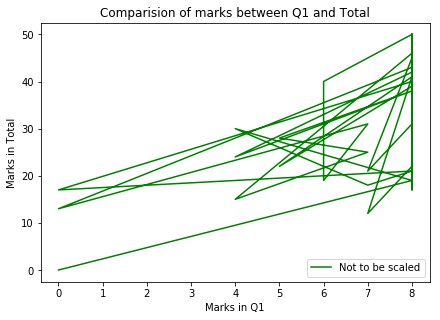

In [150]:
x = student['Q1']
y = student['Total']
fig = plt.figure()
axes_main = fig.add_axes([0.1,0.1,0.9,0.9])


axes_main.plot(x, y, 'g',label="Not to be scaled")
axes_main.set_xlabel('Marks in Q1')
axes_main.set_ylabel('Marks in Total')
axes_main.set_title('Comparision of marks between Q1 and Total');
axes_main.legend(loc=4)

In [151]:
##Graph between Q2 and Total

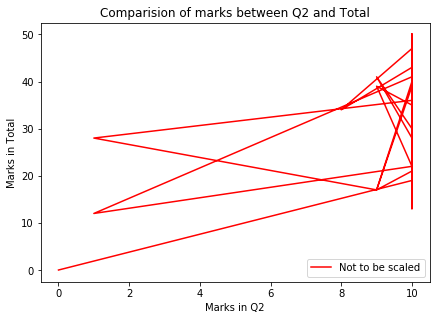

In [152]:
x = student['Q2']
y = student['Total']
fig = plt.figure()
axes_main = fig.add_axes([0.1,0.1,0.9,0.9])


axes_main.plot(x, y, 'r',label="Not to be scaled")
axes_main.set_xlabel('Marks in Q2')
axes_main.set_ylabel('Marks in Total')
axes_main.set_title('Comparision of marks between Q2 and Total');
axes_main.legend(loc=4)

In [153]:
##Graph between Q3 and Total

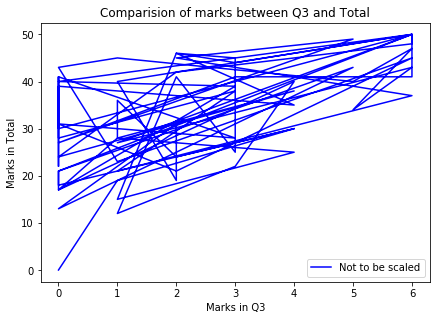

In [154]:
x = student['Q3']
y = student['Total']
fig = plt.figure()
axes_main = fig.add_axes([0.1,0.1,0.9,0.9])


axes_main.plot(x, y, 'b',label="Not to be scaled")
axes_main.set_xlabel('Marks in Q3')
axes_main.set_ylabel('Marks in Total')
axes_main.set_title('Comparision of marks between Q3 and Total');
axes_main.legend(loc=4)

In [155]:
##Graph between Q4 and Total

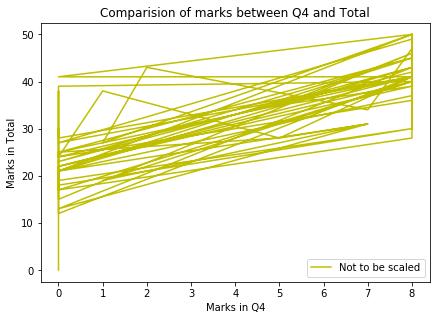

In [156]:
x = student['Q4']
y = student['Total']
fig = plt.figure()
axes_main = fig.add_axes([0.1,0.1,0.9,0.9])


axes_main.plot(x, y, 'y',label="Not to be scaled")
axes_main.set_xlabel('Marks in Q4')
axes_main.set_ylabel('Marks in Total')
axes_main.set_title('Comparision of marks between Q4 and Total');
axes_main.legend(loc=4)

In [157]:
##Graph between Q5 and Total

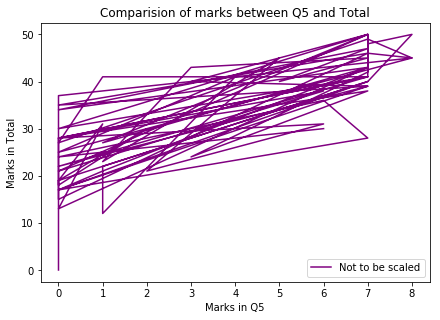

In [158]:
x = student['Q5']
y = student['Total']
fig = plt.figure()
axes_main = fig.add_axes([0.1,0.1,0.9,0.9])


axes_main.plot(x, y, 'purple',label="Not to be scaled")
axes_main.set_xlabel('Marks in Q5')
axes_main.set_ylabel('Marks in Total')
axes_main.set_title('Comparision of marks between Q5 and Total');
axes_main.legend(loc=4)

In [159]:
##Graph between Q6 and Total

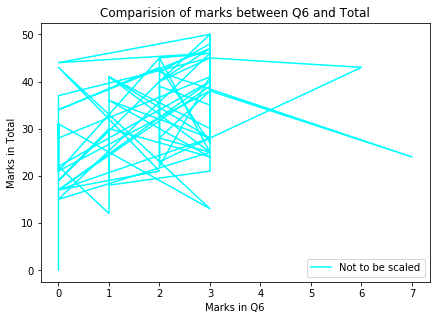

In [160]:
x = student['Q6']
y = student['Total']
fig = plt.figure()
axes_main = fig.add_axes([0.1,0.1,0.9,0.9])


axes_main.plot(x, y, 'cyan',label="Not to be scaled")
axes_main.set_xlabel('Marks in Q6')
axes_main.set_ylabel('Marks in Total')
axes_main.set_title('Comparision of marks between Q6 and Total');
axes_main.legend(loc=4)

In [161]:
##Graph between Q7 and Total

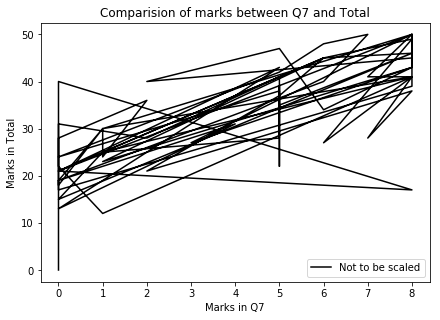

In [162]:
x = student['Q7']
y = student['Total']
fig = plt.figure()
axes_main = fig.add_axes([0.1,0.1,0.9,0.9])


axes_main.plot(x, y, 'black',label="Not to be scaled")
axes_main.set_xlabel('Marks in Q7')
axes_main.set_ylabel('Marks in Total')
axes_main.set_title('Comparision of marks between Q7 and Total');
axes_main.legend(loc=4)

In [163]:
# Logistic Regression

In [164]:
## Split the data into training set and testing set using train_test_split

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X = student[['Q1', 'Q2', 'Q3',
               'Q4', 'Q5', 'Q6', 'Q7']]
y = student['Total']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
##Train and fit a logistic regression model on the training set.

In [169]:
from sklearn.linear_model import LogisticRegression

In [171]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [172]:
## Predictions and Evaluations. Now predict values for the testing data.

In [179]:
predictions = logmodel.predict(X_test)

In [174]:
## Model Evaluation

In [175]:
print(logmodel.intercept_)

[ 0.62617724 -0.62367905 -0.64543395 -0.70539524 -0.68829957 -0.88176791
 -0.69832449 -0.78903392 -0.73409489 -0.75826841 -0.78809309 -0.69797383
 -0.69850375 -0.73429468 -0.74829679 -0.77738222 -0.76171826 -0.748385
 -0.89759434 -0.8080783  -0.74060422 -0.72658704 -0.78031725 -0.7711111
 -0.75730884 -0.7416899  -0.75462501]


In [182]:
## Predictions from our Model

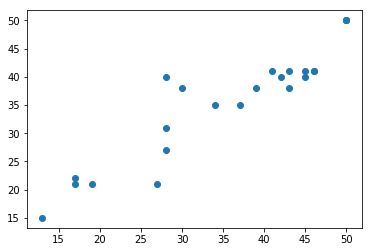

In [183]:
plt.scatter(y_test,predictions)